In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_29_06_02.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Adding 'barcelona' column with values equal to 1
df['barcelona'] = 1

# Adding the 'event' column with values equal to 1
df['event'] = 1

# Display the DataFrame
print(df.shape)

(431, 10)


In [4]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_29_06_02.csv'

# Read the CSV file into a DataFrame
V1 = pd.read_csv(file_path)

# Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 1
df = pd.concat([df, V1.assign(barcelona=0, event=1)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from V1:")
print(df.shape)



Updated df after adding rows from V1:
(754, 10)


In [5]:
# # Specify the path to the CSV file
# file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_24_05_28.csv'

# # Read the CSV file into a DataFrame
# V0 = pd.read_csv(file_path)

# # Adding rows from V1 to df with 'barcelona' values set to 0 and 'event' values set to 0
# df = pd.concat([df, V0.assign(barcelona=0, event=0)], ignore_index=True)

# # Displaying the updated df DataFrame
# print("\nUpdated df after adding rows from V1:")
# print(df.shape)

In [6]:
# Specify the path to the CSV file
file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Valencia_05_24_05_28.csv'

# Read the CSV file into a DataFrame (V0)
V0 = pd.read_csv(file_path)

# Filter the rows in V0 where 'Hotels' exists in the 'Hotels' column of V1
filtered_V0 = V0[V0['Hotels'].isin(V1['Hotels'])]

# Adding rows from filtered V0 to df with 'barcelona' values set to 0 and 'event' values set to 0
df = pd.concat([df, filtered_V0.assign(barcelona=0, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from filtered V0:")
print(df.shape)



Updated df after adding rows from filtered V0:
(781, 10)


In [7]:
# # Specify the path to the CSV file
# file_path = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_24_05_28.csv'

# # Read the CSV file into a DataFrame
# B0 = pd.read_csv(file_path)

# # Adding rows from B0 to df with 'barcelona' values set to 1 and 'event' values set to 0
# df = pd.concat([df, B0.assign(barcelona=1, event=0)], ignore_index=True)

# # Displaying the updated df DataFrame
# print("\nUpdated df after adding rows from V1:")
# print(df.shape)
# print(df.columns)

In [8]:
import pandas as pd

# Specify the path to the CSV file (BO)
file_path_BO = 'C:/Users/bakwe/Desktop/BSE/Text_mining/HW1/Scraped_data/Barcelona_05_24_05_28.csv'

# Read the CSV file into a DataFrame (BO)
B0 = pd.read_csv(file_path_BO)

# Filter the rows in BO where 'Hotels' exists in the 'Hotels' column of df
filtered_B0 = B0[B0['Hotels'].isin(df['Hotels'])]

# Adding rows from filtered BO to df with 'barcelona' values set to 1 and 'event' values set to 0
df = pd.concat([df, filtered_B0.assign(barcelona=1, event=0)], ignore_index=True)

# Displaying the updated df DataFrame
print("\nUpdated df after adding rows from filtered BO:")
print(df.shape)
print(df.columns)



Updated df after adding rows from filtered BO:
(1042, 10)
Index(['Hotels', 'Ratings', 'Distance', 'District', 'Price', 'Link', 'Star',
       'Descriptions', 'barcelona', 'event'],
      dtype='object')


In [9]:
# Create a DataFrame
df = pd.DataFrame(df)

In [10]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': € 1.903


In [11]:
# Extract only digits from the 'Price' column and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Extract the first digit and convert to numeric
df['Star'] = pd.to_numeric(df['Star'].str.extract('(\d)', expand=False), errors='coerce')

# Display the updated DataFrame
print(df.head())

                                   Hotels Ratings             Distance  \
0  Ciudad Condal Hostal - Paseo de Gracia     7,2    a 1 km del centro   
1        DO Plaça Reial powered by Sonder     8,4  a 0,9 km del centro   
2                   SEALONA VILA OLIMPICA     8,4  a 1,8 km del centro   
3                  Habitaciones Viladomat     8,0  a 1,7 km del centro   
4       Nice apartment BCN two rooms wifi     8,4    a 2 km del centro   

   District  Price                                               Link  Star  \
0       NaN    720  https://www.booking.com/hotel/es/ciudad-condal...     3   
1       NaN   1920  https://www.booking.com/hotel/es/do.es.html?la...     5   
2       NaN    360  https://www.booking.com/hotel/es/sealona-vila-...     4   
3       NaN    374  https://www.booking.com/hotel/es/habitaciones-...     4   
4       NaN    398  https://www.booking.com/hotel/es/nice-apartmen...     4   

                                        Descriptions  barcelona  event  
0  El H

In [12]:
# Find the 'Price' value when 'Hotels' is equal to 'Ohla Barcelona'
ohla_barcelona_price = df.loc[df['Hotels'] == 'Ohla Barcelona', 'Price'].values[0]

# Print the 'Price' value
print("Price for 'Hotels' == 'Ohla Barcelona':", ohla_barcelona_price)

Price for 'Hotels' == 'Ohla Barcelona': 1903


In [13]:
# Display the count of NaN values in each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hotels        1042 non-null   object 
 1   Ratings       1042 non-null   object 
 2   Distance      1042 non-null   object 
 3   District      0 non-null      float64
 4   Price         1042 non-null   int64  
 5   Link          1042 non-null   object 
 6   Star          1042 non-null   int64  
 7   Descriptions  1011 non-null   object 
 8   barcelona     1042 non-null   int64  
 9   event         1042 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 81.5+ KB
None


In [15]:
# Group the DataFrame by 'barcelona' and 'event' columns and calculate the mean of 'Price'
result = df.groupby(['barcelona', 'event'])['Price'].mean().reset_index()

# Order the result DataFrame by the 'Star' column
# result = result.sort_values(by=['Star'])

# 'result' will now contain the average 'Price' for each combination of 'barcelona' and 'event'
print(result)

   barcelona  event        Price
0          0      0   455.777778
1          0      1   568.436533
2          1      0   950.452107
3          1      1  1479.805104


In [16]:
# Count the occurrences of each unique value in the 'Star' column
star_counts = df['Star'].value_counts()

# Print the count of values for each unique 'Star'
print(star_counts)

Star
4    467
3    420
2     79
5     49
1     27
Name: count, dtype: int64


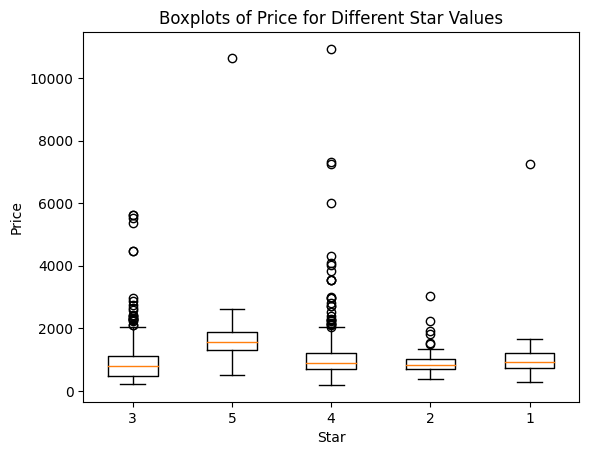

In [17]:
# Group the DataFrame by the 'Star' column and create boxplots for each group
plt.boxplot([df['Price'][df['Star'] == star] for star in df['Star'].unique()], 
            labels=df['Star'].unique())
plt.xlabel('Star')
plt.ylabel('Price')
plt.title('Boxplots of Price for Different Star Values')
plt.show()

In [18]:
# Independent variables
X = df[['barcelona']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.603
Method:                 Least Squares   F-statistic:                              1582.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                   4.09e-211
Time:                        23:11:14   Log-Likelihood:                         -8502.5
No. Observations:                1042   AIC:                                  1.701e+04
Df Residuals:                    1041   BIC:                                  1.701e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
# Independent variables
X = df[['event']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              945.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                   3.26e-148
Time:                        23:11:14   Log-Likelihood:                         -8647.4
No. Observations:                1042   AIC:                                  1.730e+04
Df Residuals:                    1041   BIC:                                  1.730e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              745.6
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                   1.75e-258
Time:                        23:11:14   Log-Likelihood:                         -8385.7
No. Observations:                1042   AIC:                                  1.678e+04
Df Residuals:                    1039   BIC:                                  1.679e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [21]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model without adding a constant term
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     97.52
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.31e-55
Time:                        23:11:14   Log-Likelihood:                -8380.8
No. Observations:                1042   AIC:                         1.677e+04
Df Residuals:                    1038   BIC:                         1.679e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              455.7778    145.186  

In [22]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     80.50
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.59e-59
Time:                        23:11:14   Log-Likelihood:                -8369.2
No. Observations:                1042   AIC:                         1.675e+04
Df Residuals:                    1037   BIC:                         1.677e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.6803    174.782  

In [23]:
# Create a new column 'Top_star' based on the condition
df['Top_star'] = (df['Star'].isin([4, 5])).astype(int)


In [24]:
# Calculate the number of observations meeting the specified conditions
num_observations = df[(df['barcelona'] == 1) & (df['Top_star'] == 1) & (df['event'] == 1)].shape[0]

# Display the result
print("Number of observations:", num_observations)

Number of observations: 220


In [25]:
# Adding the interaction term
df['interaction_term'] = df['barcelona'] * df['event']

# Independent variables
X = df[['barcelona', 'event', 'Top_star', 'interaction_term']]

# Dependent variable
y = df['Price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     77.60
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.32e-57
Time:                        23:11:14   Log-Likelihood:                -8373.7
No. Observations:                1042   AIC:                         1.676e+04
Df Residuals:                    1037   BIC:                         1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              371.6696    146.001  